<a href="https://colab.research.google.com/github/m10923039/m10923039_hw01/blob/main/test01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, recall_score, precision_score
from sklearn.metrics import precision_recall_fscore_support
import tensorflow as tf
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Input, Dense, Activation,Dropout

讀取檔案

In [ ]:
df_data=pd.read_csv('/content/ObesityDataSet_raw_and_data_sinthetic.csv')

In [ ]:
df_x=df_data.drop(['NObeyesdad'],axis=1)
df_y=df_data.loc[:,'NObeyesdad']
df_y.value_counts()
df_x['CH2O'].value_counts()

2.000000    448
1.000000    211
3.000000    162
1.636326      3
2.825629      3
           ... 
2.931438      1
2.224914      1
2.724099      1
2.714091      1
2.318736      1
Name: CH2O, Length: 1268, dtype: int64

## **資料前處理**

In [ ]:
# df_x
df_x.loc()[df_x['family_history_with_overweight']=='no','family_history_with_overweight']=0
df_x.loc()[df_x['family_history_with_overweight']=='yes','family_history_with_overweight']=1

df_x.loc()[df_x['FAVC']=='no','FAVC']=0
df_x.loc()[df_x['FAVC']=='yes','FAVC']=1

df_x.loc()[df_x['SMOKE']=='no','SMOKE']=0
df_x.loc()[df_x['SMOKE']=='yes','SMOKE']=1

df_x.loc()[df_x['SCC']=='no','SCC']=0
df_x.loc()[df_x['SCC']=='yes','SCC']=1

df_x.loc()[df_x['CAEC']=='No','CAEC']=1
df_x.loc()[df_x['CAEC']=='no','CAEC']=1
df_x.loc()[df_x['CAEC']=='Sometimes','CAEC']=2
df_x.loc()[df_x['CAEC']=='Frequently','CAEC']=3
df_x.loc()[df_x['CAEC']=='Always','CAEC']=4

df_x.loc()[df_x['CALC']=='no','CALC']=1
df_x.loc()[df_x['CALC']=='Sometimes','CALC']=2
df_x.loc()[df_x['CALC']=='Frequently','CALC']=3
df_x.loc()[df_x['CALC']=='Always','CALC']=4

df_x[['family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC']] =df_x[['family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC']].astype(int)

x = pd.get_dummies(df_x)
y = pd.get_dummies(df_y)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
# x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.15)

In [ ]:
df_x.dtypes

In [ ]:
x_train

In [ ]:
y_train

In [ ]:
input_layer = Input(shape=(x_train.shape[1],))
dense_layer_1 =Dense(32,kernel_initializer=tf.keras.initializers.GlorotNormal() ,activation='relu', name ="nl1" )(input_layer)
dense_layer_2 = Dense(16,kernel_initializer=tf.keras.initializers.GlorotNormal(),activation='relu', name ="nl2" )(dense_layer_1)
dense_layer_2 = Dense(10,activation='relu', name ="nl3" )(dense_layer_2)
dense_layer_2 = Dense(10,activation='relu', name ="nl4" )(dense_layer_2)
dense_layer_2 = Dropout(0.5)(dense_layer_2)
output = Dense(y_train.shape[1],activation='softmax')(dense_layer_2)
model = Model(inputs=input_layer, outputs=output)
print(model.summary())

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 24)]              0         
_________________________________________________________________
nl1 (Dense)                  (None, 32)                800       
_________________________________________________________________
nl2 (Dense)                  (None, 16)                528       
_________________________________________________________________
nl3 (Dense)                  (None, 10)                170       
_________________________________________________________________
nl4 (Dense)                  (None, 10)                110       
_________________________________________________________________
dropout_4 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 7)                 77  

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='acc',mode='max', patience=5)
Adam = tf.optimizers.Adam(lr=0.003, beta_1=0.9, beta_2=0.997, epsilon=1e-08, decay=0.0)
model.compile(optimizer=Adam, 
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics = [tf.keras.metrics.Precision(),tf.keras.metrics.Recall(),tf.keras.metrics.Accuracy()]
              )
history = model.fit(x=x_train, y=y_train,  epochs=50,batch_size =5, callbacks=[callback] )

Epoch 1/50
338/338 [==============================] - 1s 2ms/step - loss: 1.9877 - precision_3: 0.3253 - recall_3: 0.0167 - accuracy: 0.0000e+00
Epoch 2/50
338/338 [==============================] - 1s 2ms/step - loss: 1.6023 - precision_3: 0.5839 - recall_3: 0.0902 - accuracy: 0.0000e+00
Epoch 3/50
338/338 [==============================] - 1s 2ms/step - loss: 1.4143 - precision_3: 0.6604 - recall_3: 0.1739 - accuracy: 0.0000e+00
Epoch 4/50
338/338 [==============================] - 1s 2ms/step - loss: 1.3811 - precision_3: 0.6153 - recall_3: 0.1509 - accuracy: 1.1281e-04
Epoch 5/50
338/338 [==============================] - 1s 2ms/step - loss: 1.2601 - precision_3: 0.6886 - recall_3: 0.2251 - accuracy: 0.0014
Epoch 6/50
338/338 [==============================] - 1s 2ms/step - loss: 1.2056 - precision_3: 0.7149 - recall_3: 0.2586 - accuracy: 0.0047
Epoch 7/50
338/338 [==============================] - 1s 2ms/step - loss: 1.1872 - precision_3: 0.7334 - recall_3: 0.2701 - accuracy: 0.00

In [ ]:
preds = model.evaluate(x = x_test, y = y_test)

F1 = 2 * (preds[1] * preds[2]) / (preds[1] + preds[2])
print(preds)
print(F1)


14/14 [==============================] - 0s 2ms/step - loss: 0.5865 - precision_3: 0.8533 - recall_3: 0.6052 - accuracy: 0.1378
[0.5864861607551575, 0.8533333539962769, 0.6052009463310242, 0.13779129087924957]
0.7081604501978223


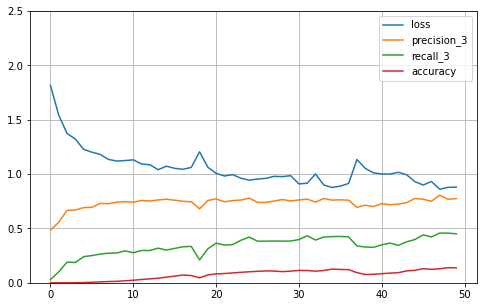

In [ ]:

pd.DataFrame(history.history).plot(figsize = (8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2.5)
plt.show()


## 數值

In [ ]:
input_layer = Input(shape=(x_train.shape[1],))
dense_layer_1 =Dense(32,kernel_initializer=tf.keras.initializers.GlorotNormal() ,activation='relu', name ="nl1" )(input_layer)
dense_layer_2 = Dense(16,kernel_initializer=tf.keras.initializers.GlorotNormal(),activation='relu', name ="nl2" )(dense_layer_1)
dense_layer_2 = Dense(10,activation='relu', name ="nl3" )(dense_layer_2)
dense_layer_2 = Dense(10,activation='relu', name ="nl4" )(dense_layer_2)
dense_layer_2 = Dropout(0.5)(dense_layer_2)
output = Dense(y_train.shape[1],activation='softmax')(dense_layer_2)
model = Model(inputs=input_layer, outputs=output)
print(model.summary())

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, recall_score, precision_score
import tensorflow as tf
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Input, Dense, Activation,Dropout

df_white = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv',sep=";")
# df_red= pd.read_csv('wine-quality/winequality-red.csv',sep=";")
# df= pd.concat([df_red,df_white],axis=0)
df=df_white



In [ ]:
df

In [ ]:
x=df.drop('quality',axis=1)
y=df['quality']
y=pd.get_dummies(y)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.15)


x_train = tf.convert_to_tensor(x_train,dtype=tf.float32)
y_train = tf.convert_to_tensor(y_train,dtype=tf.int32)

x_val = tf.convert_to_tensor(x_val,dtype=tf.float32)
y_val = tf.convert_to_tensor(y_val,dtype=tf.int32)

x_test = tf.convert_to_tensor(x_test,dtype=tf.float32)
y_test = tf.convert_to_tensor(y_test,dtype=tf.int32)


In [ ]:

input_layer = Input(shape=(x_train.shape[1],))
dense_layer_1 =Dense(22,kernel_initializer=tf.keras.initializers.GlorotNormal() ,activation='relu', name ="nl1" )(input_layer)
dense_layer_2 = Dense(11,kernel_initializer=tf.keras.initializers.GlorotNormal(),activation='relu', name ="nl2" )(dense_layer_1)
dense_layer_2 = Dense(10,activation='relu', name ="nl3" )(dense_layer_2)
dense_layer_2 = Dense(10,activation='relu', name ="nl4" )(dense_layer_2)
dense_layer_2 = Dropout(0.5)(dense_layer_2)
dense_layer_2 = Dense(10,activation='relu', name ="nl5" )(dense_layer_2)
output = Dense(y_train.shape[1],activation='softmax')(dense_layer_2)
model = Model(inputs=input_layer, outputs=output)

In [ ]:

model.summary()


In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss',mode='min', patience=5)
Adam = tf.optimizers.Adam(lr=0.003, beta_1=0.9, beta_2=0.997, epsilon=1e-08, decay=0.0)
model.compile(optimizer=Adam, 
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics = [tf.keras.metrics.PrecisionAtRecall(),tf.keras.metrics.Recall(),tf.keras.metrics.CategoricalAccuracy()]
              )
history = model.fit(x=x_train, y=y_train,  epochs=30,batch_size =5, callbacks=[callback])


In [ ]:
y_predicted = model.predict(x_test)
history.history


# y_predicted = model.predict(x_test)
preds = model.evaluate(x = x_test, y = y_test)
print()
print(preds)



In [ ]:
pd.DataFrame(history.history).plot(figsize = (8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2.5)
plt.show()